In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import time

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.style.use('ggplot')

In [2]:
@jit
def quad_func(Z: complex, 
               c: complex):
    return Z**2 + c

@jit
def julia_set(boundR: float, boundI: float, c: complex, size: int, N: int):
    
    R = 2.
    
    reals = np.linspace(-boundR, boundR, size)
    imags = np.linspace(-boundI, boundI, size)
    
    dims = (reals.size, imags.size)
    
    result_matrix = np.zeros(dims)
    
#     Zs = np.meshgrid(np, imags)
#     Jset = zeros_like()
    
    for i in range(dims[0]):
        for j in range(dims[1]):
            a = reals[i]
            b = imags[j]
            
            z = a + b*1j
            
            for k in range(N):
                z = quad_func(z, c)
                if abs(z) > R:
                    result_matrix[i,j] = k
                    break
            if (k == N-1):
                result_matrix[i,j] = k
                
    return result_matrix

In [3]:
# test_c = -0.7269 + 0.1889j
# test_c = 0.285 + 0.01j
test_c = -0.74543 +0.11301j


%time test1 = julia_set(1.5, 1.5, test_c, 5000, 100)

CPU times: user 3.27 s, sys: 112 ms, total: 3.38 s
Wall time: 3.59 s


CPU times: user 909 ms, sys: 445 ms, total: 1.35 s
Wall time: 1.6 s


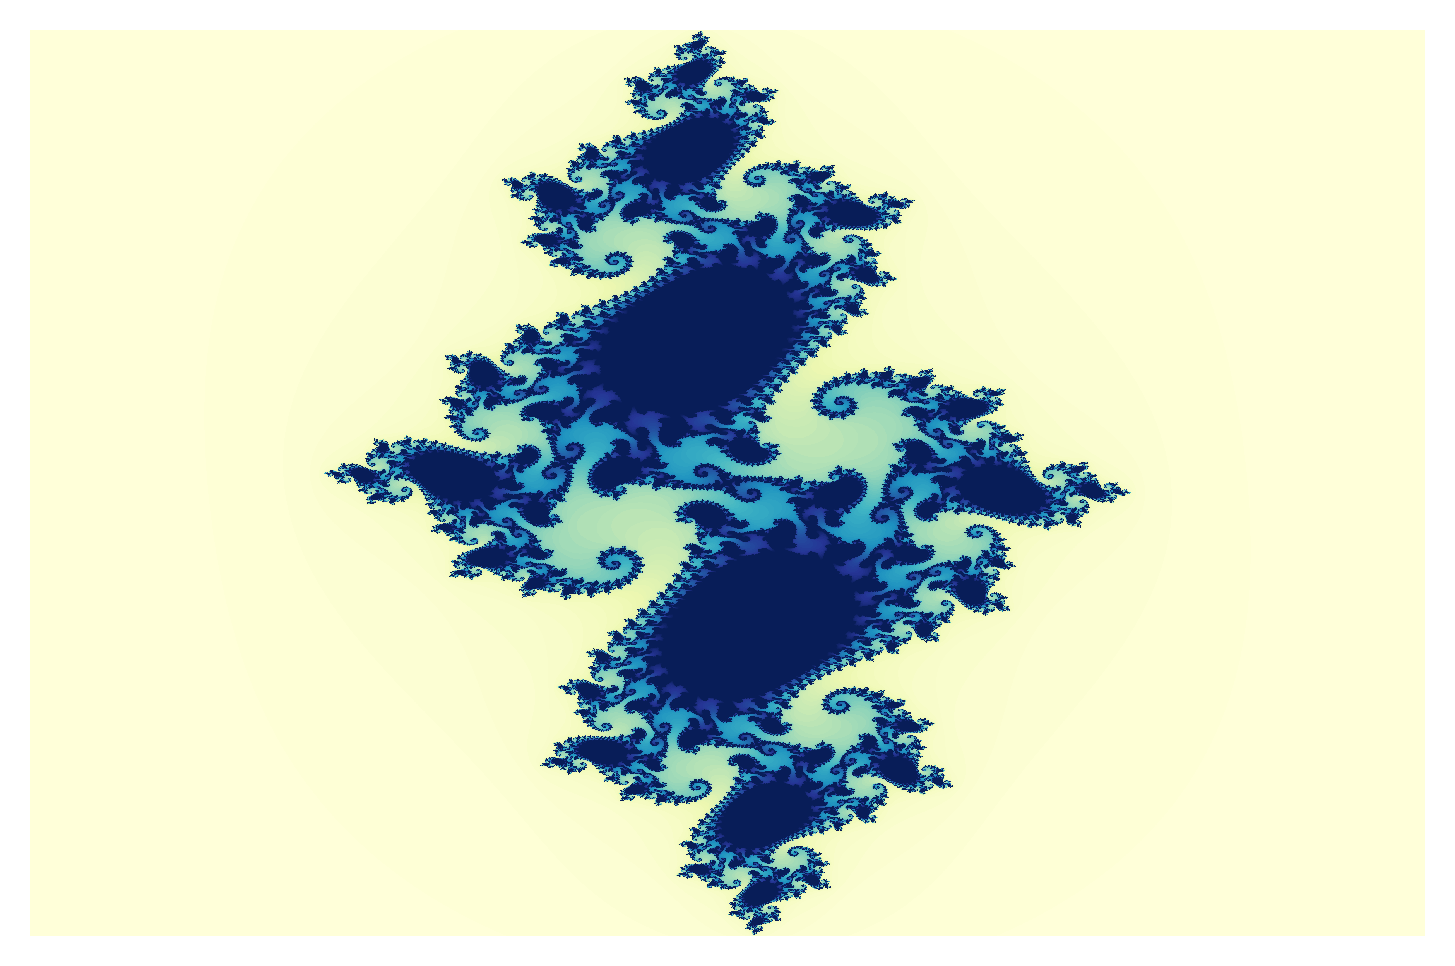

In [4]:
plt.grid(False)
plt.axis('off')
# %time plt.pcolormesh(test1,cmap='PuBu')
%time plt.pcolormesh(test1,cmap='YlGnBu')

In [7]:
# Save soln as gif
plt.ioff()
fig, ax = plt.subplots()
import matplotlib.animation


def test_animate(t):
    ax.cla()
    testi = julia_set(1.5, 1.5, 0.7885*np.exp(t/10*1j), 1000, 200)
    ax.grid(False)
    ax.axis('off')
    ax.pcolormesh(testi,cmap='YlGnBu')

test_anim = matplotlib.animation.FuncAnimation(fig, test_animate, frames=np.arange(0, 10*int(2*np.pi), 0.1))
test_anim.save('./test_movingjulia.gif', writer='Pillow', fps=60)

plt.close()

MovieWriter Pillow unavailable; using Pillow instead.


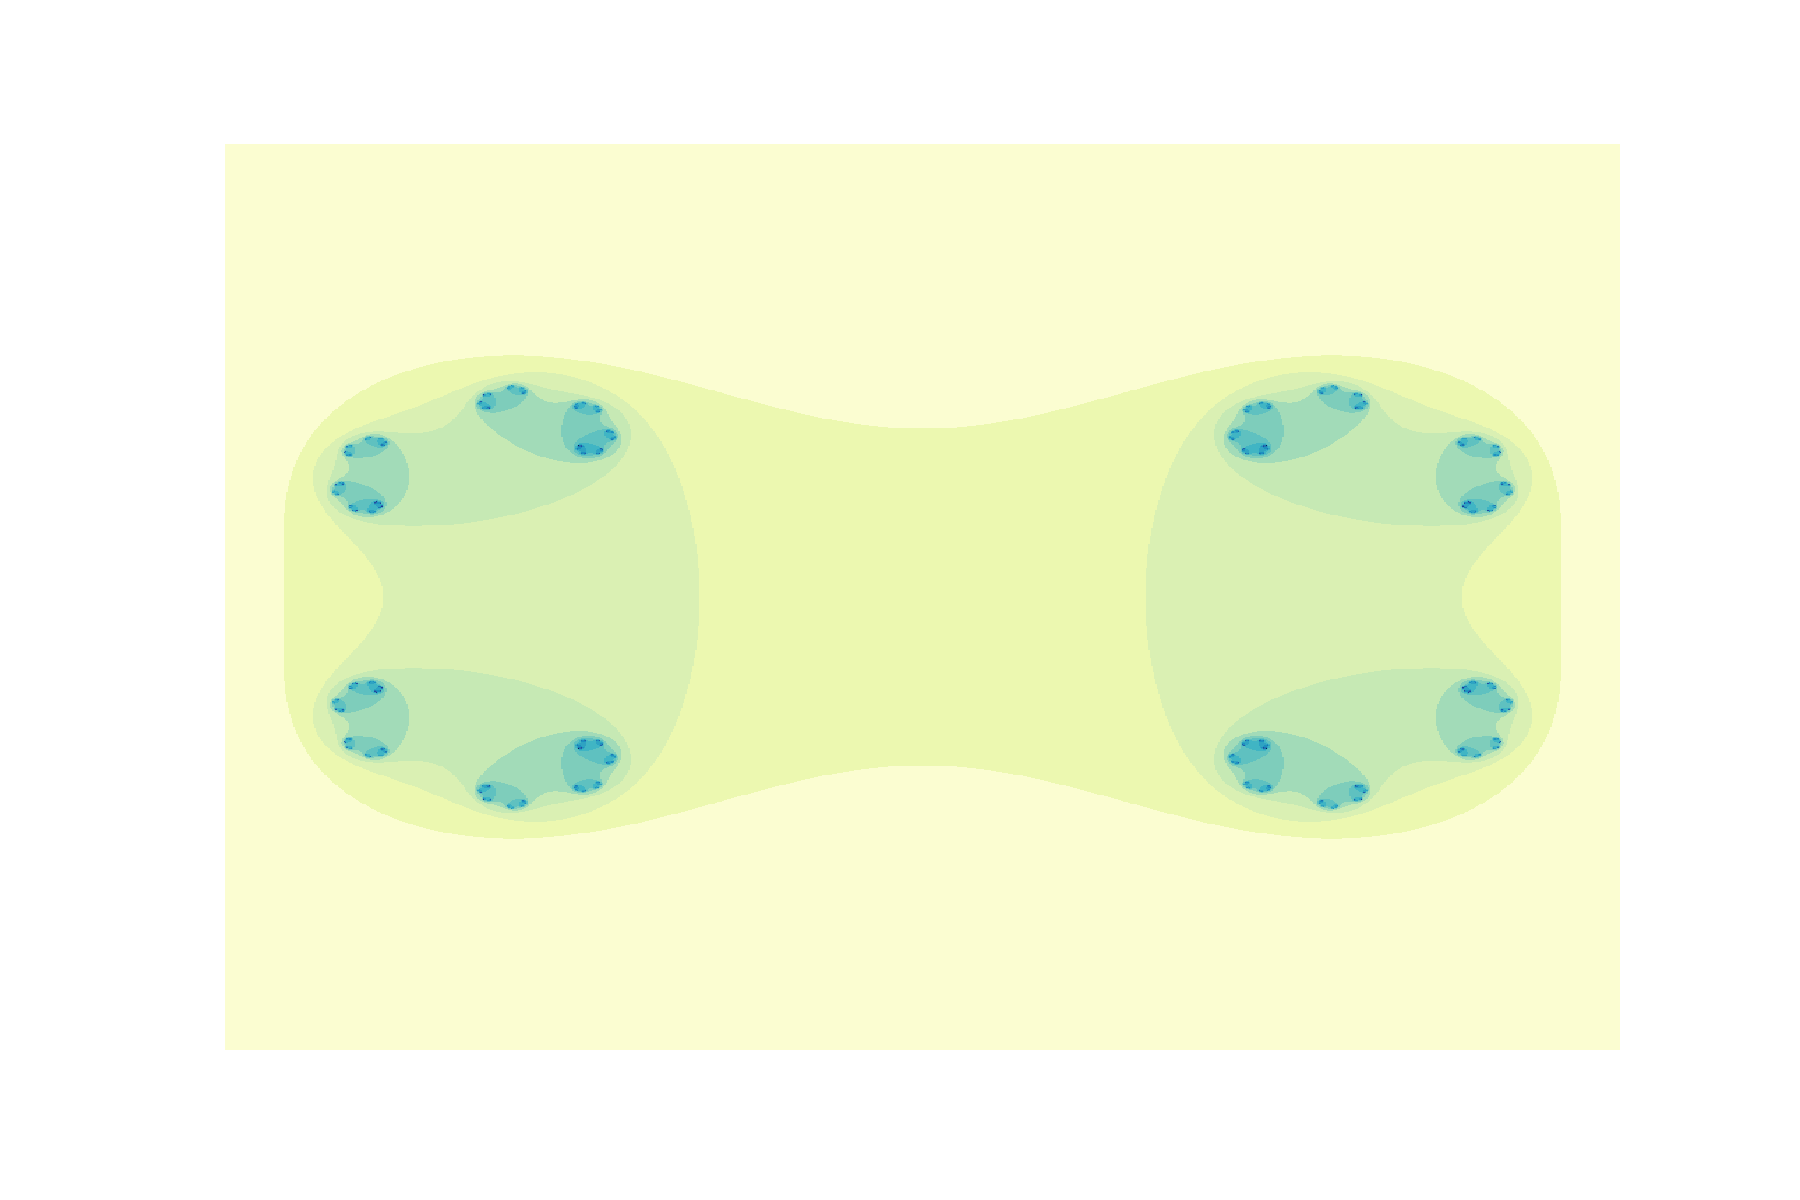

In [6]:
from IPython.display import HTML, Image
display(Image(data=open('./test_movingjulia.gif','rb').read(), format='png'))